In [10]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-01-19 12:40:50--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-01-19 12:40:50--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca69693a7e9a2467fd9bf2b82d1.dl.dropboxusercontent.com/cd/0/inline/BHQfwV7lvFNA71m93jaxSfTi9V2YBbLhWEP3xB_e500phZgjuONzOUSFrI-xNURXStbWfOMosgyGLXcRPQfgjYPQpPchCYJUUf8y5nnD1Fr_sgKXcLvnagDcsxHQo2Csw6U/file# [following]
--2021-01-19 12:40:50--  https://uca69693a7e9a2467fd9bf2b82d1.dl.dropboxusercontent.com/cd/0/inline/BHQfwV7lvFNA71m93jaxSfTi9V2YBbLhWEP3xB_e500phZgjuONzOUSFrI-xNURXStbWfOMosgyGLXcRPQfgjYPQpPchCYJUUf8

In [11]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

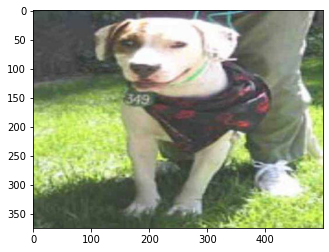

In [15]:
img1=mpimg.imread('/content/training_set/training_set/dogs/dog.989.jpg')
imgplot1=plt.imshow(img1)
plt.show()

In [16]:
import tensorflow as tf

In [17]:
img_width, img_height = 150,150  
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [18]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3,img_width,img_height)
else:
    input_shape=(img_width,img_height,3)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [20]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range =0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [21]:
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size =(150,150),batch_size=20,class_mode='binary',classes=['cats','dogs'])
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(150,150),batch_size=20,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [22]:
model=tf.keras.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 22,431,617
Trainable params: 22,431,617
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
training = model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_sample,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 78s 766ms/step - loss: 7.4559 - accuracy: 0.5097 - val_loss: 0.6570 - val_accuracy: 0.5905
Epoch 2/20
100/100 [==============================] - 75s 748ms/step - loss: 0.6789 - accuracy: 0.6186 - val_loss: 0.6308 - val_accuracy: 0.6530
Epoch 3/20
100/100 [==============================] - 75s 752ms/step - loss: 0.6733 - accuracy: 0.6400 - val_loss: 0.6129 - val_accuracy: 0.6865
Epoch 4/20
100/100 [==============================] - 75s 755ms/step - loss: 0.6142 - accuracy: 0.6853 - val_loss: 0.5814 - val_accuracy: 0.6985
Epoch 5/20
100/100 [==============================] - 76s 756ms/step - loss: 0.6278 - accuracy: 0.6714 - val_loss: 0.6190 - val_accuracy: 0.6755
Epoch 6/20
100/100 [==============================] - 75s 750ms/step - loss: 0.6473 - accuracy: 0.6872 - val_loss: 0.6137 - val_accuracy: 0.6880
Epoch 7/20
100/100 [==============================] - 75s 748ms/step - loss: 0.5811 - accuracy: 0.6916 - val_loss: 0.5720 - val_ac

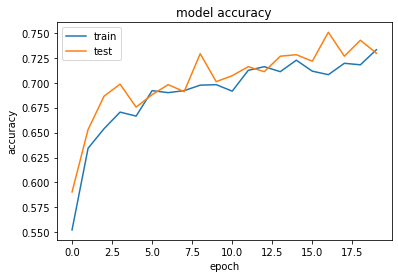

In [25]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

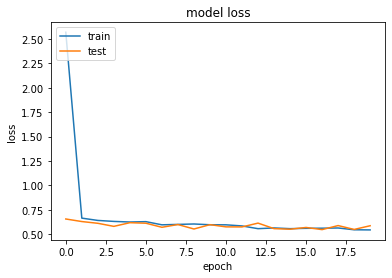

In [26]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
model1=tf.keras.Sequential([
      tf.keras.layers.Conv2D(64,3,3,input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2560064   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 2,561,921
Trainable params: 2,561,921
Non-trainable params: 0
_________________________________________________________________


In [28]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
training1= model1.fit_generator(train_generator,
                    steps_per_epoch=nb_train_sample,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 28s 274ms/step - loss: 0.9080 - accuracy: 0.5116 - val_loss: 0.6598 - val_accuracy: 0.5815
Epoch 2/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6616 - accuracy: 0.5797 - val_loss: 0.6411 - val_accuracy: 0.6380
Epoch 3/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6432 - accuracy: 0.6089 - val_loss: 0.6123 - val_accuracy: 0.6735
Epoch 4/20
100/100 [==============================] - 27s 273ms/step - loss: 0.6188 - accuracy: 0.6628 - val_loss: 0.6535 - val_accuracy: 0.6080
Epoch 5/20
100/100 [==============================] - 27s 271ms/step - loss: 0.6160 - accuracy: 0.6528 - val_loss: 0.5871 - val_accuracy: 0.7075
Epoch 6/20
100/100 [==============================] - 27s 273ms/step - loss: 0.5793 - accuracy: 0.6944 - val_loss: 0.5724 - val_accuracy: 0.7060
Epoch 7/20
100/100 [==============================] - 27s 271ms/step - loss: 0.5852 - accuracy: 0.6841 - val_loss: 0.5723 - val_ac

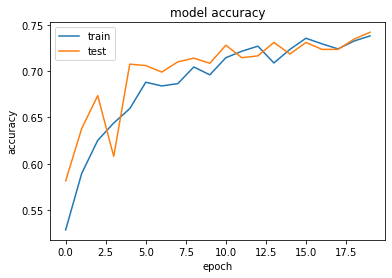

In [30]:
plt.plot(training1.history['accuracy'])
plt.plot(training1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

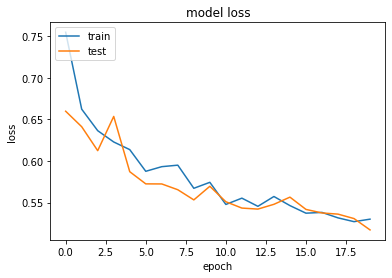

In [31]:
plt.plot(training1.history['loss'])
plt.plot(training1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#SGD

In [32]:
model2=tf.keras.Sequential([
      tf.keras.layers.Conv2D(64,3,3,input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2560064   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 2,561,921
Trainable params: 2,561,921
Non-trainable params: 0
_________________________________________________________________


In [34]:
model2.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
training2= model2.fit_generator(train_generator,
                    steps_per_epoch=nb_train_sample,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 28s 276ms/step - loss: 0.7050 - accuracy: 0.5141 - val_loss: 0.6868 - val_accuracy: 0.5595
Epoch 2/20
100/100 [==============================] - 27s 273ms/step - loss: 0.6944 - accuracy: 0.5096 - val_loss: 0.6971 - val_accuracy: 0.5105
Epoch 3/20
100/100 [==============================] - 27s 272ms/step - loss: 0.6923 - accuracy: 0.5419 - val_loss: 0.6832 - val_accuracy: 0.5515
Epoch 4/20
100/100 [==============================] - 27s 270ms/step - loss: 0.6865 - accuracy: 0.5512 - val_loss: 0.6833 - val_accuracy: 0.5405
Epoch 5/20
100/100 [==============================] - 27s 272ms/step - loss: 0.6813 - accuracy: 0.5551 - val_loss: 0.6753 - val_accuracy: 0.5750
Epoch 6/20
100/100 [==============================] - 27s 272ms/step - loss: 0.6808 - accuracy: 0.5688 - val_loss: 0.6719 - val_accuracy: 0.5990
Epoch 7/20
100/100 [==============================] - 27s 274ms/step - loss: 0.6749 - accuracy: 0.5768 - val_loss: 0.6692 - val_ac

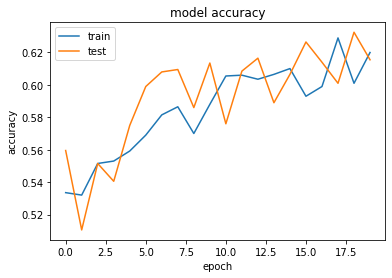

In [36]:
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

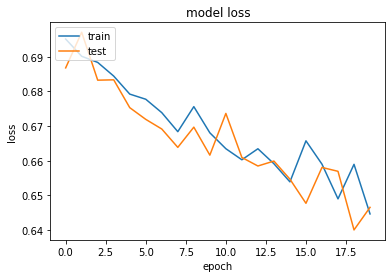

In [37]:
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#add convlution layer

In [38]:
model3=tf.keras.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(128,(3,3),input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                10616896  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [39]:
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
training3= model3.fit_generator(train_generator,
                    steps_per_epoch=nb_train_sample,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 143s 1s/step - loss: 1.0772 - accuracy: 0.4972 - val_loss: 0.6892 - val_accuracy: 0.4990
Epoch 2/20
100/100 [==============================] - 142s 1s/step - loss: 0.6914 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5190
Epoch 3/20
100/100 [==============================] - 143s 1s/step - loss: 0.6930 - accuracy: 0.4815 - val_loss: 0.7073 - val_accuracy: 0.5050
Epoch 4/20
100/100 [==============================] - 142s 1s/step - loss: 0.6938 - accuracy: 0.5164 - val_loss: 0.6852 - val_accuracy: 0.5540
Epoch 5/20
100/100 [==============================] - 142s 1s/step - loss: 0.6818 - accuracy: 0.5750 - val_loss: 0.6569 - val_accuracy: 0.6125
Epoch 6/20
100/100 [==============================] - 142s 1s/step - loss: 0.6671 - accuracy: 0.5766 - val_loss: 0.6813 - val_accuracy: 0.5570
Epoch 7/20
100/100 [==============================] - 142s 1s/step - loss: 0.6880 - accuracy: 0.5492 - val_loss: 0.6711 - val_accuracy: 0.5970

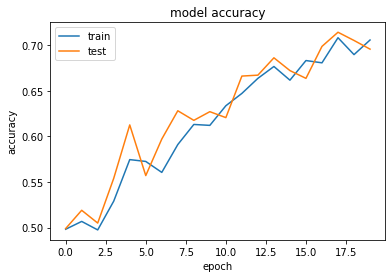

In [42]:
plt.plot(training3.history['accuracy'])
plt.plot(training3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

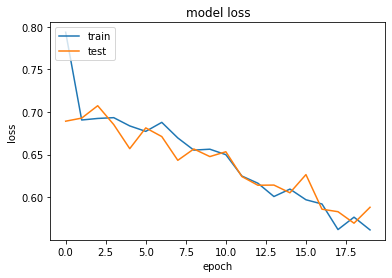

In [43]:
plt.plot(training3.history['loss'])
plt.plot(training3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

[[0.]]
Prediction:  Cat


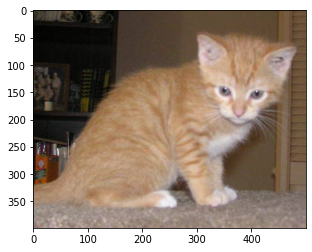

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat" 
print('Prediction: ',prediction)    

img=mpimg.imread('/content/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

[[1.]]
Prediction:  Dog


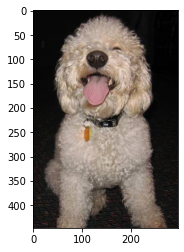

In [46]:
img_pred = image.load_img("/content/test_set/test_set/dogs/dog.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#add dense layer

In [47]:
model4=tf.keras.Sequential([
      tf.keras.layers.Conv2D(64,(3,3),input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Conv2D(128,(3,3),input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                10616896  
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [48]:
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
training4= model4.fit_generator(train_generator,
                    steps_per_epoch=nb_train_sample,
                    epochs=20,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)

Epoch 1/20
100/100 [==============================] - 143s 1s/step - loss: 0.7927 - accuracy: 0.5126 - val_loss: 0.6894 - val_accuracy: 0.5555
Epoch 2/20
100/100 [==============================] - 141s 1s/step - loss: 0.6903 - accuracy: 0.5565 - val_loss: 0.6808 - val_accuracy: 0.5700
Epoch 3/20
100/100 [==============================] - 142s 1s/step - loss: 0.6853 - accuracy: 0.5532 - val_loss: 0.6769 - val_accuracy: 0.6105
Epoch 4/20
100/100 [==============================] - 141s 1s/step - loss: 0.6843 - accuracy: 0.5730 - val_loss: 0.6679 - val_accuracy: 0.6020
Epoch 5/20
100/100 [==============================] - 141s 1s/step - loss: 0.6750 - accuracy: 0.5956 - val_loss: 0.8313 - val_accuracy: 0.5925
Epoch 6/20
100/100 [==============================] - 141s 1s/step - loss: 0.7064 - accuracy: 0.5992 - val_loss: 0.6803 - val_accuracy: 0.5600
Epoch 7/20
100/100 [==============================] - 142s 1s/step - loss: 0.6709 - accuracy: 0.5967 - val_loss: 0.6645 - val_accuracy: 0.6110

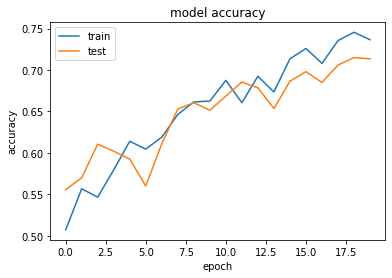

In [50]:
plt.plot(training4.history['accuracy'])
plt.plot(training4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

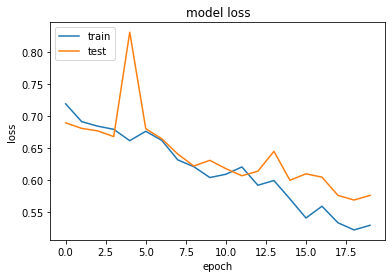

In [51]:
plt.plot(training4.history['loss'])
plt.plot(training4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [41]:
#increase epoches

In [52]:
model5=tf.keras.Sequential([
      tf.keras.layers.Conv2D(64,3,3,input_shape=input_shape,activation='relu'),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid'),
])
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2560064   
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 2,561,921
Trainable params: 2,561,921
Non-trainable params: 0
_________________________________________________________________


In [53]:
model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
training5= model5.fit_generator(train_generator,
                    steps_per_epoch=nb_train_sample,
                    epochs=50,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples)

Epoch 1/50
100/100 [==============================] - 28s 274ms/step - loss: 0.8814 - accuracy: 0.5159 - val_loss: 0.6683 - val_accuracy: 0.5330
Epoch 2/50
100/100 [==============================] - 27s 273ms/step - loss: 0.6651 - accuracy: 0.5979 - val_loss: 0.6693 - val_accuracy: 0.5665
Epoch 3/50
100/100 [==============================] - 27s 275ms/step - loss: 0.6441 - accuracy: 0.6262 - val_loss: 0.6677 - val_accuracy: 0.5770
Epoch 4/50
100/100 [==============================] - 27s 271ms/step - loss: 0.6370 - accuracy: 0.6164 - val_loss: 0.6232 - val_accuracy: 0.6550
Epoch 5/50
100/100 [==============================] - 27s 273ms/step - loss: 0.6356 - accuracy: 0.6265 - val_loss: 0.6112 - val_accuracy: 0.6720
Epoch 6/50
100/100 [==============================] - 27s 271ms/step - loss: 0.6087 - accuracy: 0.6686 - val_loss: 0.6557 - val_accuracy: 0.6205
Epoch 7/50
100/100 [==============================] - 27s 272ms/step - loss: 0.5893 - accuracy: 0.6921 - val_loss: 0.6076 - val_ac

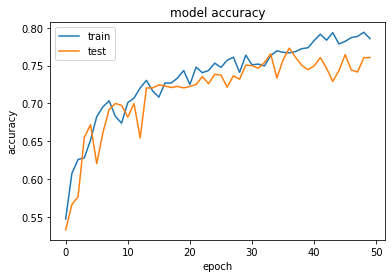

In [55]:
plt.plot(training5.history['accuracy'])
plt.plot(training5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

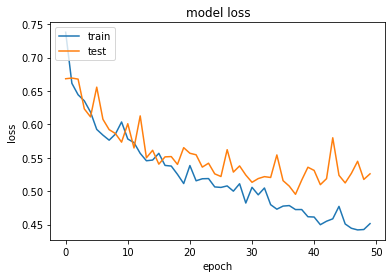

In [56]:
plt.plot(training5.history['loss'])
plt.plot(training5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()